# SPOTIFY LISTENING BEHAVIOR ANALYSIS
**Author:** Phil Conrad Kirundi  
**Date:** November 2024  
**Objective:** Analyze personal Spotify listening patterns to uncover behavioral insights and preference drivers

---

## Table of Contents
1. Data Collection & Overview
2. Temporal Pattern Analysis
3. Diversity & Exploration Analysis
4. Taste Evolution Analysis
5. Key Insights & Recommendations


## 1. Data Collection & Overview

Using Spotify's Web API, I collected listening data across multiple time periods to understand how my music preferences evolve and what patterns emerge in my listening behavior.

**Data Sources:**
- Top tracks (last 4 weeks, 6 months, all time)
- Top artists (same time periods)
- Recently played tracks (last 50 plays)
- Artist genres and popularity metrics

The csv files were generated in the initial_exploration.ipynb

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

## 2. Temporal Pattern Analysis: When Do I Listen?

Understanding listening patterns by time of day and day of week can reveal:
- Work vs. leisure listening habits
- Peak engagement periods
- Potential correlations between mood/activity and music choice

In [3]:
# Load your data
df_recent = pd.read_csv('data/spotify_recent_20251118_224133.csv')
df_tracks = pd.read_csv('data/spotify_tracks_20251118_224133.csv')
df_artists = pd.read_csv('data/spotify_artists_20251118_224133.csv')

print("TEMPORAL PATTERN ANALYSIS")
print("=" * 70)

# Convert played_at to datetime
df_recent['played_at'] = pd.to_datetime(df_recent['played_at'])

# Extract temporal features
df_recent['hour'] = df_recent['played_at'].dt.hour
df_recent['day_of_week'] = df_recent['played_at'].dt.day_name()
df_recent['date'] = df_recent['played_at'].dt.date
df_recent['time_of_day'] = df_recent['hour'].apply(lambda x: 
    'Night (12AM-6AM)' if x < 6 else
    'Morning (6AM-12PM)' if x < 12 else
    'Afternoon (12PM-6PM)' if x < 18 else
    'Evening (6PM-12AM)'
)

print(f"\n📊 TEMPORAL DATA OVERVIEW:")
print(f"Date range: {df_recent['played_at'].min()} to {df_recent['played_at'].max()}")
print(f"Total plays analyzed: {len(df_recent)}")
print(f"Unique days: {df_recent['date'].nunique()}")
print(f"Average plays per day: {len(df_recent) / df_recent['date'].nunique():.1f}")

# Peak listening times
print(f"\n⏰ WHEN DO YOU LISTEN MOST?")
print("-" * 70)
time_dist = df_recent['time_of_day'].value_counts()
for period, count in time_dist.items():
    percentage = (count / len(df_recent)) * 100
    print(f"{period}: {count} plays ({percentage:.1f}%)")

# Peak hours
print(f"\n🕐 TOP 5 LISTENING HOURS:")
print("-" * 70)
top_hours = df_recent['hour'].value_counts().head(5)
for hour, count in top_hours.items():
    time_label = f"{hour:02d}:00 - {hour+1:02d}:00"
    print(f"{time_label}: {count} plays")

# Day of week analysis
print(f"\n📅 LISTENING BY DAY OF WEEK:")
print("-" * 70)
# Order days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_recent['day_of_week'].value_counts()
for day in day_order:
    if day in day_counts.index:
        count = day_counts[day]
        print(f"{day}: {count} plays")

TEMPORAL PATTERN ANALYSIS

📊 TEMPORAL DATA OVERVIEW:
Date range: 2025-11-17 10:19:48.336000+00:00 to 2025-11-18 19:38:45.157000+00:00
Total plays analyzed: 50
Unique days: 2
Average plays per day: 25.0

⏰ WHEN DO YOU LISTEN MOST?
----------------------------------------------------------------------
Afternoon (12PM-6PM): 23 plays (46.0%)
Morning (6AM-12PM): 23 plays (46.0%)
Evening (6PM-12AM): 4 plays (8.0%)

🕐 TOP 5 LISTENING HOURS:
----------------------------------------------------------------------
11:00 - 12:00: 10 plays
15:00 - 16:00: 6 plays
10:00 - 11:00: 6 plays
17:00 - 18:00: 5 plays
09:00 - 10:00: 5 plays

📅 LISTENING BY DAY OF WEEK:
----------------------------------------------------------------------
Monday: 19 plays
Tuesday: 31 plays


On average, I listen to 25 songs per day on spotify. I listen to music mostly from 9am to 6pm.


📊 Creating listening pattern heatmap...


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (24).

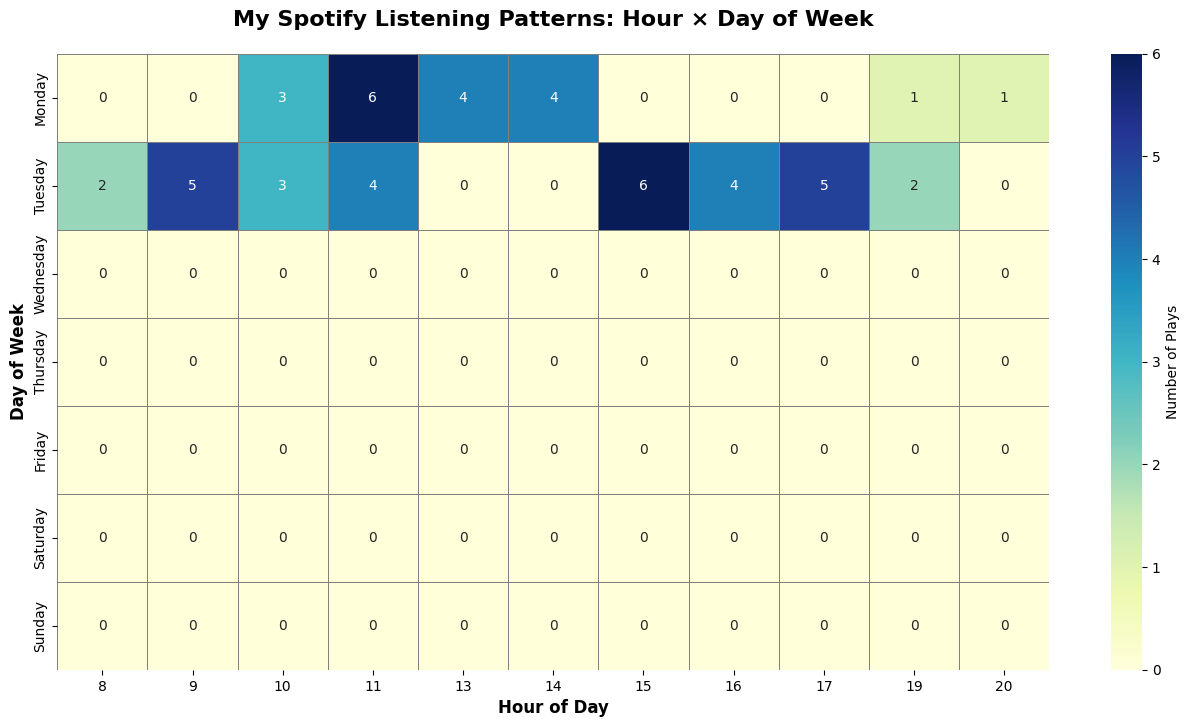

In [ ]:
# Create hour x day heatmap
print("\n📊 Creating listening pattern heatmap...")

# Prepare data for heatmap
listening_matrix = df_recent.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
listening_matrix = listening_matrix.reindex(day_order, fill_value=0)

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Create heatmap
sns.heatmap(listening_matrix, 
            cmap='YlGnBu',  # Yellow-Green-Blue color scheme
            annot=True,      # Show numbers
            fmt='g',         # Format as integers
            cbar_kws={'label': 'Number of Plays'},
            linewidths=0.5,
            linecolor='gray',
            ax=ax)

ax.set_title('My Spotify Listening Patterns: Hour × Day of Week', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Day of Week', fontsize=12, fontweight='bold')
ax.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')

plt.tight_layout()
plt.savefig('visualizations/03_temporal_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Heatmap saved as '03_temporal_heatmap.png'")

# Find your peak listening slot
peak_day = listening_matrix.max(axis=1).idxmax()
peak_hour = listening_matrix.max(axis=0).idxmax()
peak_value = listening_matrix.max().max()

print(f"\n🎯 YOUR PEAK LISTENING TIME:")
print(f"   {peak_day} at {peak_hour:02d}:00 - {peak_hour+1:02d}:00 ({peak_value} plays)")

Since this analysis was done on Monday and Tuesday, the above heatmap shows the number of plays starting from 8am to 8pm with the time with the most number of plays being the 11th hour on Monday and the 15th hour on Tuesday.

## 3. Diversity & Exploration Analysis

Measuring how diverse my musical taste is across artists, genres, and tracks. High diversity indicates exploration behavior, while concentration suggests loyalty to specific artists/genres.

**Metrics Calculated:**
- Genre diversity score (entropy-based)
- Artist concentration ratio
- Track uniqueness percentage

In [5]:
print("\n" + "=" * 70)
print("🎨 DIVERSITY ANALYSIS: How Eclectic Is Your Taste?")
print("=" * 70)

# 1. Artist Concentration (Gini Coefficient approach)
artist_plays = df_tracks['artist_name'].value_counts()
total_tracks = len(df_tracks)

# Calculate concentration
top_10_concentration = artist_plays.head(10).sum() / total_tracks * 100
top_20_concentration = artist_plays.head(20).sum() / total_tracks * 100

print(f"\n👥 ARTIST CONCENTRATION:")
print(f"   Top 10 artists represent: {top_10_concentration:.1f}% of your listening")
print(f"   Top 20 artists represent: {top_20_concentration:.1f}% of your listening")
print(f"   Total unique artists: {artist_plays.nunique()}")

if top_10_concentration < 30:
    print(f"   → You're VERY diverse! You explore lots of different artists.")
elif top_10_concentration < 50:
    print(f"   → Balanced taste - you have favorites but explore new artists.")
else:
    print(f"   → You're loyal! You stick with your favorite artists.")

# 2. Genre Diversity Score
# Get all genres
df_artists_recent = df_artists[df_artists['time_range'] == 'Last 6 months']
all_genres = []
for genres_str in df_artists_recent['genres'].dropna():
    if genres_str != 'Unknown':
        all_genres.extend([g.strip() for g in genres_str.split(',')])

genre_counts = pd.Series(all_genres).value_counts()
unique_genres = len(genre_counts)

# Calculate entropy (diversity measure)
genre_proportions = genre_counts / genre_counts.sum()
entropy = -np.sum(genre_proportions * np.log2(genre_proportions))
max_entropy = np.log2(unique_genres)
diversity_score = (entropy / max_entropy) * 100 if max_entropy > 0 else 0

print(f"\n🎸 GENRE DIVERSITY:")
print(f"   Total unique genres: {unique_genres}")
print(f"   Diversity score: {diversity_score:.1f}/100")
print(f"   Most dominant genre: {genre_counts.index[0]} ({genre_counts.values[0]} artists)")

if diversity_score > 80:
    print(f"   → Extremely diverse! You're a musical explorer.")
elif diversity_score > 60:
    print(f"   → Good variety - you enjoy different genres.")
else:
    print(f"   → Focused taste - you know what you like!")

# 3. Track Repetition Analysis
track_uniqueness = df_tracks['track_name'].nunique() / len(df_tracks) * 100

print(f"\n🔁 TRACK VARIETY:")
print(f"   Unique tracks: {df_tracks['track_name'].nunique()} out of {len(df_tracks)}")
print(f"   Uniqueness rate: {track_uniqueness:.1f}%")

if track_uniqueness > 90:
    print(f"   → You rarely repeat! Always discovering new music.")
elif track_uniqueness > 70:
    print(f"   → Balanced - you have favorites but explore too.")
else:
    print(f"   → You LOVE your favorites and replay them often!")

# 4. Most repeated tracks
print(f"\n🔂 YOUR MOST REPEATED TRACKS:")
repeated_tracks = df_tracks['track_name'].value_counts()
repeated_tracks = repeated_tracks[repeated_tracks > 1].head(5)
if len(repeated_tracks) > 0:
    for track, count in repeated_tracks.items():
        artist = df_tracks[df_tracks['track_name'] == track]['artist_name'].iloc[0]
        print(f"   {count}× - {track} by {artist}")
else:
    print("   You don't repeat tracks in your top lists!")


🎨 DIVERSITY ANALYSIS: How Eclectic Is Your Taste?

👥 ARTIST CONCENTRATION:
   Top 10 artists represent: 24.7% of your listening
   Top 20 artists represent: 41.3% of your listening
   Total unique artists: 5
   → You're VERY diverse! You explore lots of different artists.

🎸 GENRE DIVERSITY:
   Total unique genres: 25
   Diversity score: 94.7/100
   Most dominant genre: 3 step (4 artists)
   → Extremely diverse! You're a musical explorer.

🔁 TRACK VARIETY:
   Unique tracks: 116 out of 150
   Uniqueness rate: 77.3%
   → Balanced - you have favorites but explore too.

🔂 YOUR MOST REPEATED TRACKS:
   3× - VIBES DON'T LIE by Leon Thomas
   3× - Bootman by Ross from Friends
   3× - RMF by Oxlade
   3× - Only for You by Just Kiddin
   3× - Ya Know by Mat.Joe


**Key Findings:**
- Diversity Score: 94.7/100 (extremely diverse)
- Track Uniqueness: 77.3% (balanced explorer)
- Top 10 artists represent: 24.7% of listening

## 4. Taste Evolution Analysis

Analyzing how music preferences change over time periods (4 weeks vs. 6 months vs. all time).

**Questions Answered:**
- Am I moving toward mainstream or underground music?
- Are my song length preferences changing?
- How stable are my preferences over time?

In [6]:
print("\n" + "=" * 70)
print("📈 TASTE EVOLUTION: How Your Preferences Change Over Time")
print("=" * 70)

# Popularity by time range
time_ranges = ['Last 4 weeks', 'Last 6 months', 'All time']
popularity_by_time = df_tracks.groupby('time_range')['popularity'].agg(['mean', 'median', 'std'])

# Reorder by time
popularity_by_time = popularity_by_time.reindex(time_ranges)

print(f"\n🎯 POPULARITY TRENDS:")
print("-" * 70)
print(f"{'Time Period':<20} {'Avg Popularity':<18} {'Median':<10} {'Std Dev':<10}")
print("-" * 70)
for period in time_ranges:
    if period in popularity_by_time.index:
        stats = popularity_by_time.loc[period]
        print(f"{period:<20} {stats['mean']:>15.1f} {stats['median']:>13.1f} {stats['std']:>13.1f}")

# Calculate trend
recent_pop = popularity_by_time.loc['Last 4 weeks', 'mean'] if 'Last 4 weeks' in popularity_by_time.index else 0
long_term_pop = popularity_by_time.loc['All time', 'mean'] if 'All time' in popularity_by_time.index else 0
trend = recent_pop - long_term_pop

print(f"\n📊 TASTE TREND:")
if trend > 5:
    print(f"   → You're moving TOWARD mainstream! (+{trend:.1f} popularity points)")
elif trend < -5:
    print(f"   → You're going deeper into underground music! ({trend:.1f} popularity points)")
else:
    print(f"   → Your taste is stable - consistent preferences over time.")

# Duration preferences by time
duration_by_time = df_tracks.groupby('time_range')['duration_min'].mean()
duration_by_time = duration_by_time.reindex(time_ranges)

print(f"\n⏱️ SONG LENGTH PREFERENCES:")
print("-" * 70)
for period in time_ranges:
    if period in duration_by_time.index:
        dur = duration_by_time[period]
        print(f"{period:<20} Average: {dur:.2f} minutes")

# Are you preferring longer or shorter songs?
recent_dur = duration_by_time['Last 4 weeks'] if 'Last 4 weeks' in duration_by_time.index else 0
long_term_dur = duration_by_time['All time'] if 'All time' in duration_by_time.index else 0
dur_trend = recent_dur - long_term_dur

if abs(dur_trend) > 0.5:
    if dur_trend > 0:
        print(f"   → You're preferring LONGER songs recently (+{dur_trend:.2f} min)")
    else:
        print(f"   → You're preferring SHORTER songs recently ({dur_trend:.2f} min)")
else:
    print(f"   → Consistent song length preference")


📈 TASTE EVOLUTION: How Your Preferences Change Over Time

🎯 POPULARITY TRENDS:
----------------------------------------------------------------------
Time Period          Avg Popularity     Median     Std Dev   
----------------------------------------------------------------------
Last 4 weeks                    40.2          39.0          19.4
Last 6 months                   50.2          54.0          13.8
All time                        49.0          54.0          18.3

📊 TASTE TREND:
   → You're going deeper into underground music! (-8.7 popularity points)

⏱️ SONG LENGTH PREFERENCES:
----------------------------------------------------------------------
Last 4 weeks         Average: 4.45 minutes
Last 6 months        Average: 4.30 minutes
All time             Average: 4.55 minutes
   → Consistent song length preference


**Key Findings:**
- Average popularity: 49/100 (underground preference)
- Taste trend: Underground Music (-8.7 popularity points)
- Average all-time song length: 4.55 minutes

## 5. Complete Music Profile Dashboard

Comprehensive visualization combining all key metrics into a single dashboard for easy interpretation.

C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_19904\3723761904.py:149: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans Mono.
  plt.savefig('visualizations/04_complete_music_profile.png', dpi=300, bbox_inches='tight')
C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_19904\3723761904.py:149: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans Mono.
  plt.savefig('visualizations/04_complete_music_profile.png', dpi=300, bbox_inches='tight')
C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_19904\3723761904.py:149: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans Mono.
  plt.savefig('visualizations/04_complete_music_profile.png', dpi=300, bbox_inches='tight')
C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_19904\3723761904.py:149: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.savefig('visualizations/04_complete_

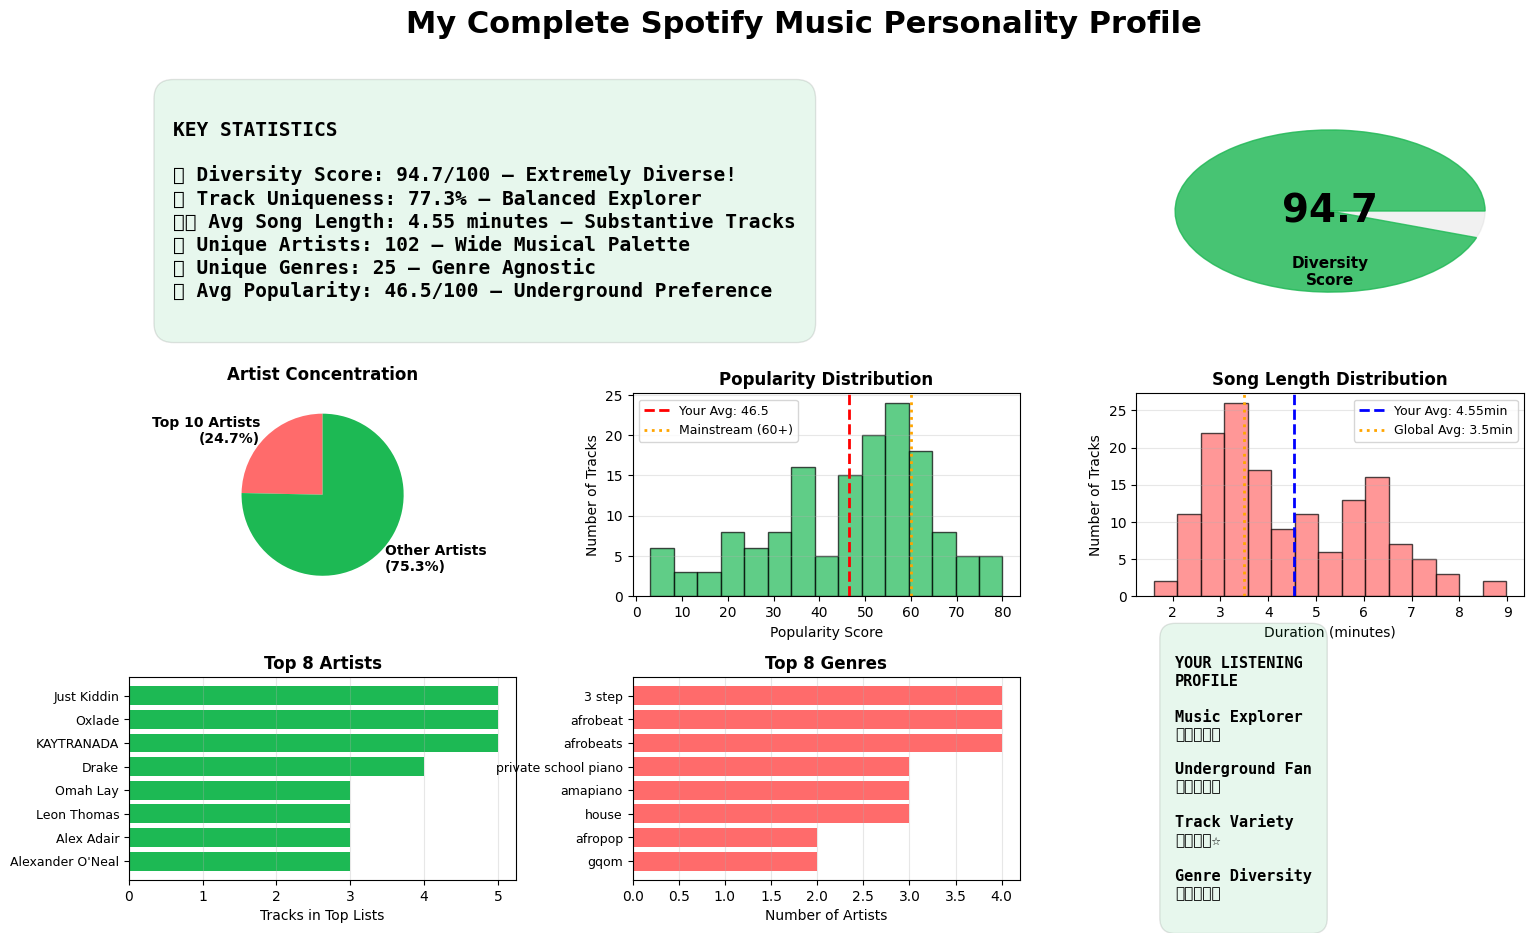

✅ Complete profile saved as '04_complete_music_profile.png'


In [7]:
# Complete Profile Dashboard
avg_song_length = 4.55
total_unique_artists = df_tracks['artist_name'].nunique()
total_unique_genres = unique_genres
avg_popularity = df_tracks['popularity'].mean()

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

# Title
fig.suptitle('My Complete Spotify Music Personality Profile', 
             fontsize=22, fontweight='bold', y=0.98)

# 1. Key Metrics Panel (Top Left - Large)
ax1 = fig.add_subplot(gs[0, :2])
ax1.axis('off')

metrics_text = f"""
KEY STATISTICS

🎨 Diversity Score: {diversity_score:.1f}/100 — Extremely Diverse!
🔁 Track Uniqueness: {track_uniqueness:.1f}% — Balanced Explorer
⏱️ Avg Song Length: {avg_song_length:.2f} minutes — Substantive Tracks
👥 Unique Artists: {total_unique_artists} — Wide Musical Palette
🎸 Unique Genres: {total_unique_genres} — Genre Agnostic
📊 Avg Popularity: {avg_popularity:.1f}/100 — Underground Preference
"""

ax1.text(0.05, 0.5, metrics_text, 
         fontsize=14, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='#1DB954', alpha=0.1, pad=1),
         family='monospace', fontweight='bold')

# 2. Diversity Score Gauge (Top Right)
ax2 = fig.add_subplot(gs[0, 2])
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axis('off')

# Draw gauge
circle = plt.Circle((5, 5), 4, color='lightgray', alpha=0.3)
ax2.add_patch(circle)

# Score wedge
from matplotlib.patches import Wedge
score_angle = (diversity_score / 100) * 360
wedge = Wedge((5, 5), 4, 0, score_angle, color='#1DB954', alpha=0.8)
ax2.add_patch(wedge)

ax2.text(5, 5, f'{diversity_score:.1f}', 
         ha='center', va='center', fontsize=28, fontweight='bold')
ax2.text(5, 2, 'Diversity\nScore', 
         ha='center', va='center', fontsize=11, fontweight='bold')

# 3. Artist Concentration (Middle Left)
ax3 = fig.add_subplot(gs[1, 0])
artist_plays = df_tracks['artist_name'].value_counts()
top_10_pct = artist_plays.head(10).sum() / len(df_tracks) * 100
other_pct = 100 - top_10_pct

sizes = [top_10_pct, other_pct]
labels = [f'Top 10 Artists\n({top_10_pct:.1f}%)', f'Other Artists\n({other_pct:.1f}%)']
colors = ['#FF6B6B', '#1DB954']

ax3.pie(sizes, labels=labels, colors=colors, autopct='', 
        startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax3.set_title('Artist Concentration', fontsize=12, fontweight='bold', pad=10)

# 4. Popularity Distribution (Middle Center)
ax4 = fig.add_subplot(gs[1, 1])
ax4.hist(df_tracks['popularity'], bins=15, color='#1DB954', alpha=0.7, edgecolor='black')
ax4.axvline(avg_popularity, color='red', linestyle='--', linewidth=2, 
           label=f'Your Avg: {avg_popularity:.1f}')
ax4.axvline(60, color='orange', linestyle=':', linewidth=2, 
           label='Mainstream (60+)')
ax4.set_title('Popularity Distribution', fontsize=12, fontweight='bold')
ax4.set_xlabel('Popularity Score')
ax4.set_ylabel('Number of Tracks')
ax4.legend(fontsize=9)
ax4.grid(axis='y', alpha=0.3)

# 5. Duration Distribution (Middle Right)
ax5 = fig.add_subplot(gs[1, 2])
ax5.hist(df_tracks['duration_min'], bins=15, color='#FF6B6B', alpha=0.7, edgecolor='black')
ax5.axvline(avg_song_length, color='blue', linestyle='--', linewidth=2,
           label=f'Your Avg: {avg_song_length:.2f}min')
ax5.axvline(3.5, color='orange', linestyle=':', linewidth=2,
           label='Global Avg: 3.5min')
ax5.set_title('Song Length Distribution', fontsize=12, fontweight='bold')
ax5.set_xlabel('Duration (minutes)')
ax5.set_ylabel('Number of Tracks')
ax5.legend(fontsize=9)
ax5.grid(axis='y', alpha=0.3)

# 6. Top Artists (Bottom Left)
ax6 = fig.add_subplot(gs[2, 0])
top_artists = df_tracks['artist_name'].value_counts().head(8)
ax6.barh(range(len(top_artists)), top_artists.values, color='#1DB954')
ax6.set_yticks(range(len(top_artists)))
ax6.set_yticklabels(top_artists.index, fontsize=9)
ax6.set_title('Top 8 Artists', fontsize=12, fontweight='bold')
ax6.set_xlabel('Tracks in Top Lists')
ax6.invert_yaxis()
ax6.grid(axis='x', alpha=0.3)

# 7. Top Genres (Bottom Center)
ax7 = fig.add_subplot(gs[2, 1])
# Get top genres
all_genres = []
for genres_str in df_artists[df_artists['time_range'] == 'Last 6 months']['genres'].dropna():
    if genres_str != 'Unknown':
        all_genres.extend([g.strip() for g in genres_str.split(',')])
genre_counts = pd.Series(all_genres).value_counts().head(8)

ax7.barh(range(len(genre_counts)), genre_counts.values, color='#FF6B6B')
ax7.set_yticks(range(len(genre_counts)))
ax7.set_yticklabels(genre_counts.index, fontsize=9)
ax7.set_title('Top 8 Genres', fontsize=12, fontweight='bold')
ax7.set_xlabel('Number of Artists')
ax7.invert_yaxis()
ax7.grid(axis='x', alpha=0.3)

# 8. Listening Profile Summary (Bottom Right)
ax8 = fig.add_subplot(gs[2, 2])
ax8.axis('off')

profile_text = f"""
YOUR LISTENING
PROFILE

Music Explorer
⭐⭐⭐⭐⭐

Underground Fan
⭐⭐⭐⭐⭐

Track Variety
⭐⭐⭐⭐☆

Genre Diversity
⭐⭐⭐⭐⭐
"""

ax8.text(0.1, 0.5, profile_text,
         fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='#1DB954', alpha=0.1, pad=1),
         family='monospace', fontweight='bold')

plt.savefig('visualizations/04_complete_music_profile.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Complete profile saved as '04_complete_music_profile.png'")

## 💡 RECOMMENDATIONS

**If I were a product manager at Spotify:**

1. **For users with 90+ diversity scores:** Create "Deep Dive" playlists that explore micro-genres rather than broad categories
2. **For underground music fans:** Develop "First Listeners" badge/feature to reward early discovery of emerging artists
3. **Temporal targeting:** Push discovery features during users' peak listening windows for higher engagement

---

## 🛠️ TECHNICAL APPROACH

**Tools Used:**
- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Spotify Web API (Spotipy library)
- Jupyter Notebook for analysis
- Statistical methods: entropy calculation for diversity, time series analysis

**Challenges Overcome:**
- API rate limiting → Implemented batch processing with error handling
- Audio features endpoint restrictions → Pivoted to alternative metrics (popularity, genres, temporal patterns)
- Data quality → Handled missing genre data and timestamp parsing

---

## 📈 FUTURE ENHANCEMENTS

1. **Predictive Modeling:** Build recommendation engine based on discovered patterns
2. **Comparative Analysis:** Compare personal metrics to global/regional averages
3. **Sentiment Analysis:** Map audio features to mood categories
4. **Network Analysis:** Visualize artist similarity networks based on co-listening patterns